# Tutorial: Generative Models

In which you will:
* identify the quantities comprising the measured data and the parameters of the model;
* organize the data and parameters in terms of their conditional dependences into a probabilistic graphical model;
* express the dependences as specific probabilistic or deterministic relationships among variables;
* implement a model in code, and generate mock data.

## Preliminaries

This exercise is mostly to practice going from a real-world(ish) problem described in words to an actionable model.

To be explicit, by model, we mean
1. a list of quantities comprising your data and parameters from which predicted data can be produced;
2. a PGM representing the conditional dependences of the parameters and data;
3. a list of expressions containing the same information as the PGM, with the added specification of what probability distributions are involved.

"Expressions" in this context are of the form you saw in the reading, and need not be fully spelled-out equations, for example:
* $a \Leftarrow b,c$ 
* $x \sim \mathrm{Normal}(\mu, \sigma)$
* $\mu \sim \mathrm{some~prior}$

translates to
* $a$ is a deterministic function of $b$ and $c$
* $x$ is normally distributed with mean $\mu$ and standard deviation $\sigma$
* $\mu$ is distributed according to some prior that I would need to specify in practice, but don't necessarily have to bother with for this exercise. Here "prior" implies no dependence on other listed parameters.

_Every_ parameter and datum in the model must have such a rule for how it depends on other quantities (or priors). The result is a recipe for generating mock data, and also contains all the information needed to do inference given real data that we've collected.

There is no set rule saying that it's better to draw the PGM first and write the expressions second, or vice versa; different people find each approach more or less natural.

To turn in a PGM, you could for e.g.
* draw on paper and include a photo in the notebook
* do the digital equivalent with a tablet and stylus
* use some other simple drawing tool and include that graphic in the notebook
* use the `daft` package to produce a PGM graphic directly in Python

Personally, I find the current version of `daft` extremely ugly and have taken to using Google Drawings or old-fashioned scribbling, but whatever works.

Finally, note that **some of the situations described below are intentionally ambiguous**. Expect to have to make some assumptions in order to fully specify the model, and note what they are.

In [1]:
TutorialName = 'genmod'
exec(open('tbc.py').read()) # define TBC and TBC_above
import numpy as np
import scipy.stats as st
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Relaxed cluster fraction

X-ray imaging data for 361 galaxy clusters were analyzed, and 57 of them were found to be morphologically "relaxed" according to some metric. We want to constrain the fraction of relaxed clusters in the Universe (the probability that a randomly chosen cluster is relaxed), $f$, assuming that the data set is representative.

### 1a. Model specification

Enumerate the model parameters, draw a PGM and write down the corresponding probability expressions for this problem. Be explicit about the form of the sampling distribution (see [Essential Probability](../notes/essential_probability.ipynb)), and arbitrarily choose some prior distribution for $f$ for the second part, below. You can assume that the total number of clusters, 361, is given by fiat and doesn't need to be generated by the model.

Note: you will want to change the mode of the cell below, and in subsequent non-coding responses, to Markdown to use LaTeX mode and/or insert images.

In [2]:
import scipy.stats as st

### 1b. Generate data

Go through the process of generating mock data from the model. Produce a visualization that compares an ensemble of mock data sets (say 1000) for
1. model parameters fixed at some fiducial value(s)

In [10]:
npixel=1000
L=150
d=10
t=10.0
F=L/(4*np.pi*d**2)*np.exp(-0.5*2)
N=st.poisson.rvs(F)
N

0

2. model parameters varying according to the PGM/expressions you write down above

In [11]:
npixel=1000
L=st.norm.rvs(150,10)
d=st.norm.rvs(5,0.2)
t=st.norm.rvs(10,0.02)
F=np.zeros(npixel)
N=np.zeros(npixel)
for i in range(npixel):
    F[i]=L/(4*np.pi*d**2)*np.exp(-0.5*(i-5)**2)
    N[i]=st.poisson.rvs(F[i])
sum(N)

3.0

## 2. Linear regression

Your data is a list of $\{x_k,y_k,\sigma_k\}$ triplets, where $\sigma_k$ is some estimate of the "error" on $y_k$. You think a linear model, $y(x)=a+bx$, might explain these data.

In the absence of any better information, assume that $\vec{x}$ and $\vec{\sigma}$ are (somehow) known precisely, and that the "error" on $y_k$ is Gaussian (mean of $a+bx_k$ and standard deviation $\sigma_k$).

Enumerate the model parameters, draw a PGM and write down the corresponding probability expressions. Optionally, generate and visualize mock data for this problem.

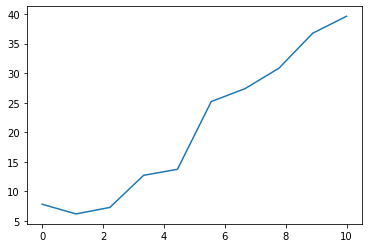

In [19]:
import matplotlib.pyplot as plt
n=1000
a=np.random.uniform(1,4)
b=np.random.uniform(0,10)
x=np.linspace(0.0,10.0,10)
e=np.random.normal(loc=0,scale=3,size=len(x))
y=a*x+b+e
plt.plot(x,y)

## 3.  Exoplanet transit photometry

You've taken several images of a particular field, in order to record the transit of an exoplanet in front of a star (resulting in a temporary decrease in its brightness). Some kind of model, parametrized by $\theta$, describes the time series of the resulting flux. Before we get to measure a number of counts, however, each image is affected by time-specific variables, e.g. related to changing weather. To account for these, you've also measured 10 other stars in the same field in every exposure (you can assume that the weather affects everything in the same image equally). The assumption is that the average intrinsic flux of these stars should be constant in time, so that they can be used to correct for photometric variations, putting the multiple measurements of the target star on the same scale.

Enumerate the model parameters, draw a PGM and write down the corresponding probability expressions. Optionally, generate and visualize mock data for this problem.

Thanks to Anja von der Linden for inspiring (and then correcting) the above problem.